In [109]:
import os
import zipfile
import urllib.request as urllib

import numpy as np
import pandas as pd
import geopandas as gpd
import pylab as pl
import glob

from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster as scp

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
!for ((y=93; y<=99; y+=1)); do wget \
ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp$y\totals.zip; done

!for ((y=0; y<=1; y+=1)); do wget \
ftp://ftp.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=2; y<=9; y+=1)); do wget \
ftp://ftp.census.gov/econ200$y\/CBP_CSV/zbp0$y\totals.zip; done

!for ((y=10; y<=14; y+=1)); do wget \
ftp://ftp.census.gov/econ20$y\/CBP_CSV/zbp$y\totals.zip; done

--2017-12-11 21:42:05--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp93totals.zip
Resolving www2.census.gov... 104.106.248.146, 2600:141b:13:288::208c, 2600:141b:13:295::208c
Connecting to www2.census.gov|104.106.248.146|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2017-12-11 21:42:05 ERROR 404: Not Found.

--2017-12-11 21:42:05--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp94totals.zip
Resolving www2.census.gov... 104.106.248.146, 2600:141b:13:288::208c, 2600:141b:13:295::208c
Connecting to www2.census.gov|104.106.248.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 611524 (597K) [application/zip]
Saving to: “zbp94totals.zip”

100%[======================================>] 611,524     --.-K/s   in 0.1s    

2017-12-11 21:42:06 (4.37 MB/s) - “zbp94totals.zip” saved [611524/611524]

--2017-12-11 21:42:06--  https://www2.census.gov/Econ2001_And_Earlier/CBP_CSV/zbp95totals.zip
Resolving www2.census.gov... 104

Resolving www2.census.gov... 104.106.248.146, 2600:141b:13:295::208c, 2600:141b:13:288::208c
Connecting to www2.census.gov|104.106.248.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 660109 (645K) [application/zip]
Saving to: “zbp09totals.zip”

100%[======================================>] 660,109     --.-K/s   in 0.05s   

2017-12-11 21:42:08 (11.8 MB/s) - “zbp09totals.zip” saved [660109/660109]

--2017-12-11 21:42:08--  https://www2.census.gov/econ2010/CBP_CSV/zbp10totals.zip
Resolving www2.census.gov... 104.106.248.146, 2600:141b:13:295::208c, 2600:141b:13:288::208c
Connecting to www2.census.gov|104.106.248.146|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 797534 (779K) [application/zip]
Saving to: “zbp10totals.zip”

100%[======================================>] 797,534     --.-K/s   in 0.03s   

2017-12-11 21:42:08 (24.1 MB/s) - “zbp10totals.zip” saved [797534/797534]

--2017-12-11 21:42:08--  https://www2.census.gov/econ201

In [9]:
l = ['94', '95','96', '97','98','99','00','01','02','03','04','05','06','07','08','09','10','11','12','13','14']

In [12]:
import pandas as pd
import zipfile 
dfs = []
for i, item in enumerate(l):
    fname = 'zbp' + item + 'totals.zip'
    zf = zipfile.ZipFile(fname)
    df.columns = [c.lower() for c in df.columns]
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    dfs.append(df)
df1 = pd.concat(dfs)

In [13]:
df1.shape

(828791, 13)

In [20]:
df1.to_csv('df1.csv')

## Download the NYC zipcodes shapefile

In [2]:
url = 'https://data.cityofnewyork.us/download/i8iw-xf4u/application/zip'
urllib.urlretrieve(url, 'NYCZIP.zip')
os.system('unzip NYCZIP.zip -d ' + os.getenv('PUIDATA') + '/NYCZIP')

256

In [3]:
for fname in os.listdir(os.getenv('PUIDATA') + '/NYCZIP'):
    if fname.endswith('shp'):
        shpfile = fname

zipcode = gpd.GeoDataFrame.from_file(os.getenv('PUIDATA') + '/NYCZIP/' + shpfile)
zipcode.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."


geopandas.geodataframe.GeoDataFrame

## Data Cleaning

In [6]:
# refer to Yuwen's code
path = os.getenv('PUIDATA')
fnames = glob.glob('zbp*.zip')
fnames = fnames[-6:] + fnames[:-6]
fnames

['zbp94totals.zip',
 'zbp95totals.zip',
 'zbp96totals.zip',
 'zbp97totals.zip',
 'zbp98totals.zip',
 'zbp99totals.zip',
 'zbp00totals.zip',
 'zbp01totals.zip',
 'zbp02totals.zip',
 'zbp03totals.zip',
 'zbp04totals.zip',
 'zbp05totals.zip',
 'zbp06totals.zip',
 'zbp07totals.zip',
 'zbp08totals.zip',
 'zbp09totals.zip',
 'zbp10totals.zip',
 'zbp11totals.zip',
 'zbp12totals.zip',
 'zbp13totals.zip',
 'zbp14totals.zip']

In [37]:
# refer to Yuewen's code
nyczips = zipcode['ZIPCODE'].unique()
df1 = pd.DataFrame(nyczips, columns=['zip'])
df1['zip'] = df1['zip'].astype(int)

# read in data one by one, merge with dfs
for f in fnames:
    # unzip file
    zf = zipfile.ZipFile(f)
    df = pd.read_csv(zf.open(f.replace('.zip','.txt')))
    
    # make sure column names are in the same case (lower)
    df.columns = [c.lower() for c in df.columns]
    
    # subset only records residing in nyc
    df = df[[str(z) in nyczips for z in df['zip']]]
    
    # extract only zip and est, then merge
    df = df[['zip', 'est']]
    df1 = df1.merge(df, on='zip', how='left')

In [38]:
df1.head()

,zip,est_x,est_y,est_x,est_y,est_x,est_y,est_x,est_y,est_x,...,est_y,est_x,est_y,est_x,est_y,est_x,est_y,est_x,est_y,est
0,11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,95.0,99.0,109.0
1,11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,726.0,755.0,772.0
2,11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,721.0,731.0,752.0
3,11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,623.0,673.0,696.0
4,11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1605.0,1687.0,1736.0


In [39]:
df1.set_index('zip', inplace=True)
df1.columns = [str(i) for i in range(1994, 2015)]

In [70]:
df2 = df1.dropna(how = 'all',axis=0)

In [71]:
df2.shape

(245, 21)

In [72]:
# Normalization
zipmean = df.mean(axis=1)
zipstd = df.std(axis=1)

In [74]:
for i,item in enumerate(df2.columns):
    df2[item] = df2[item].apply(lambda x: (x - zipmean) / zipstd)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [78]:
df2.fillna(0, inplace=True)

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [79]:
df2.shape

(245, 21)

In [118]:
# define a function that does K-means clustering and plot the results, refer to Yuwen's code
def plotKM(n, data, random=999):

    km = KMeans(random_state=random, n_clusters=n)
    res = km.fit(data.iloc[:,:21])

    data['km%s'%n] = res.labels_
    
    pl.figure(figsize=(12,8))

    for l in range(n):
        dft = data[data['km%s'%n] == l]
        means = dft.mean(axis=0)
        
        pl.subplot(521+l)
        for i in range(len(dft)):
            pl.plot(range(0,21), dft.iloc[i,:21], 'steelblue', alpha=0.3)
            pl.plot(range(0,21), means[0:21], 'indianred', linewidth=2)
        pl.title(l)

    pl.tight_layout()
    pl.show()

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


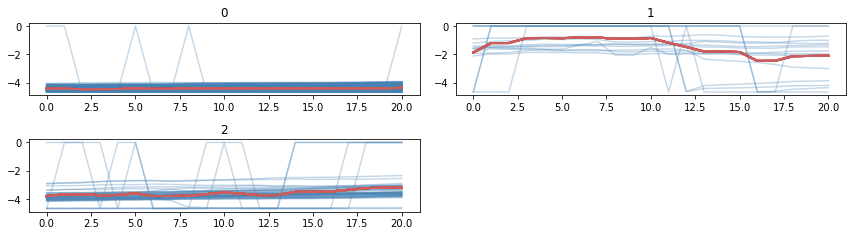

In [119]:
# 3 clusters
plotKM(3, df2)

## Fig 1. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in 3 clusters

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


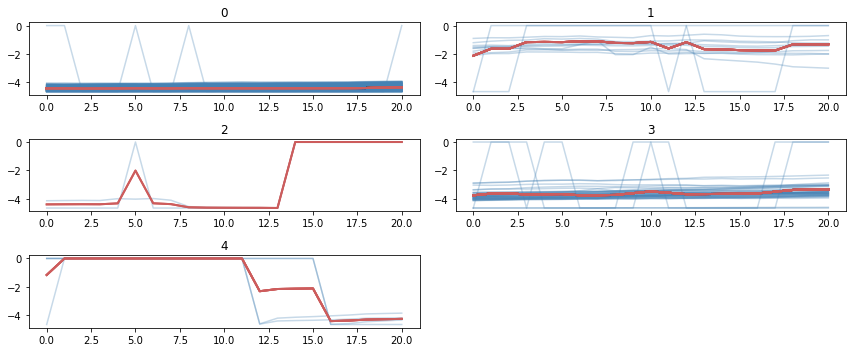

In [120]:
# 5 clusters
plotKM(5, df2)

## Fig 2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in 5 clusters

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


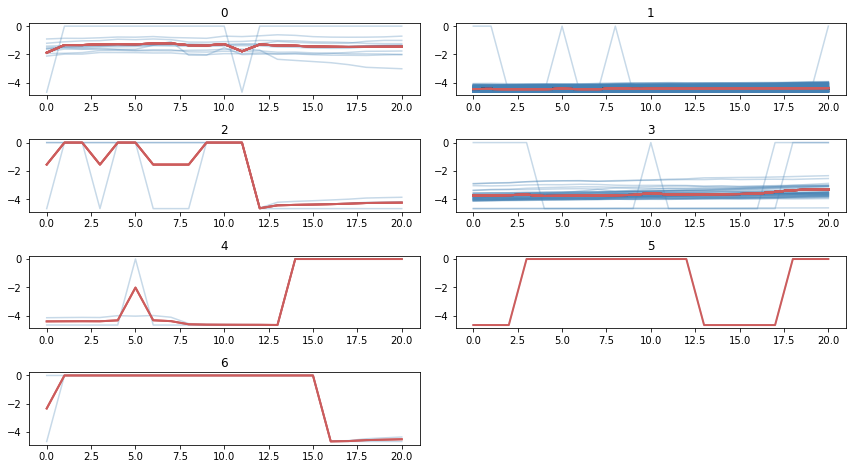

In [121]:
# 7 clusters
plotKM(7, df2)

## Fig 3. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in 7 clusters

## choose 5 clusters since the are not to many or too less

## Use another clustering algorithm (Agglomerative Clustering)

In [122]:
ac = AgglomerativeClustering(n_clusters=5, compute_full_tree=True)
res = ac.fit(df2.iloc[:,:21])
df2['ac'] = res.labels_

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


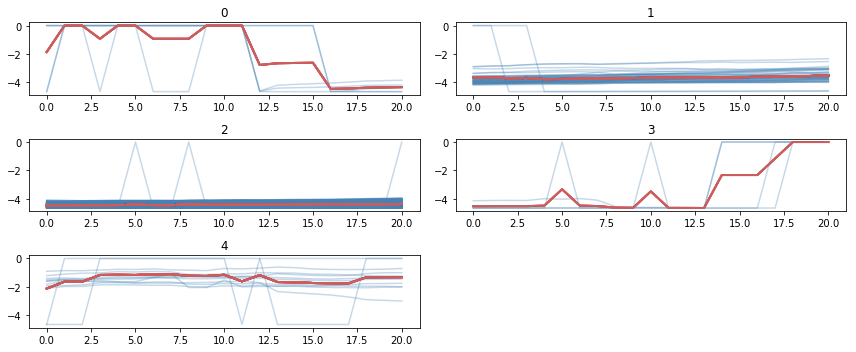

In [123]:
pl.figure(figsize=(12,8))
for l in range(5):
    df_ = df2[df2['ac'] == l]
    means = df_.mean(axis=0)
    pl.subplot(521+l)
    for i in range(len(df_)):
        pl.plot(range(0,21), df_.iloc[i,:21], 'steelblue', alpha=0.3)
        pl.plot(range(0,21), means[0:21], 'indianred', linewidth=2)
    pl.title(l)
pl.tight_layout()


## Figure 4. cluster the NUMBER OF ESTABLISHMENTS time series with Aggolomerative clustering in 5 clusters

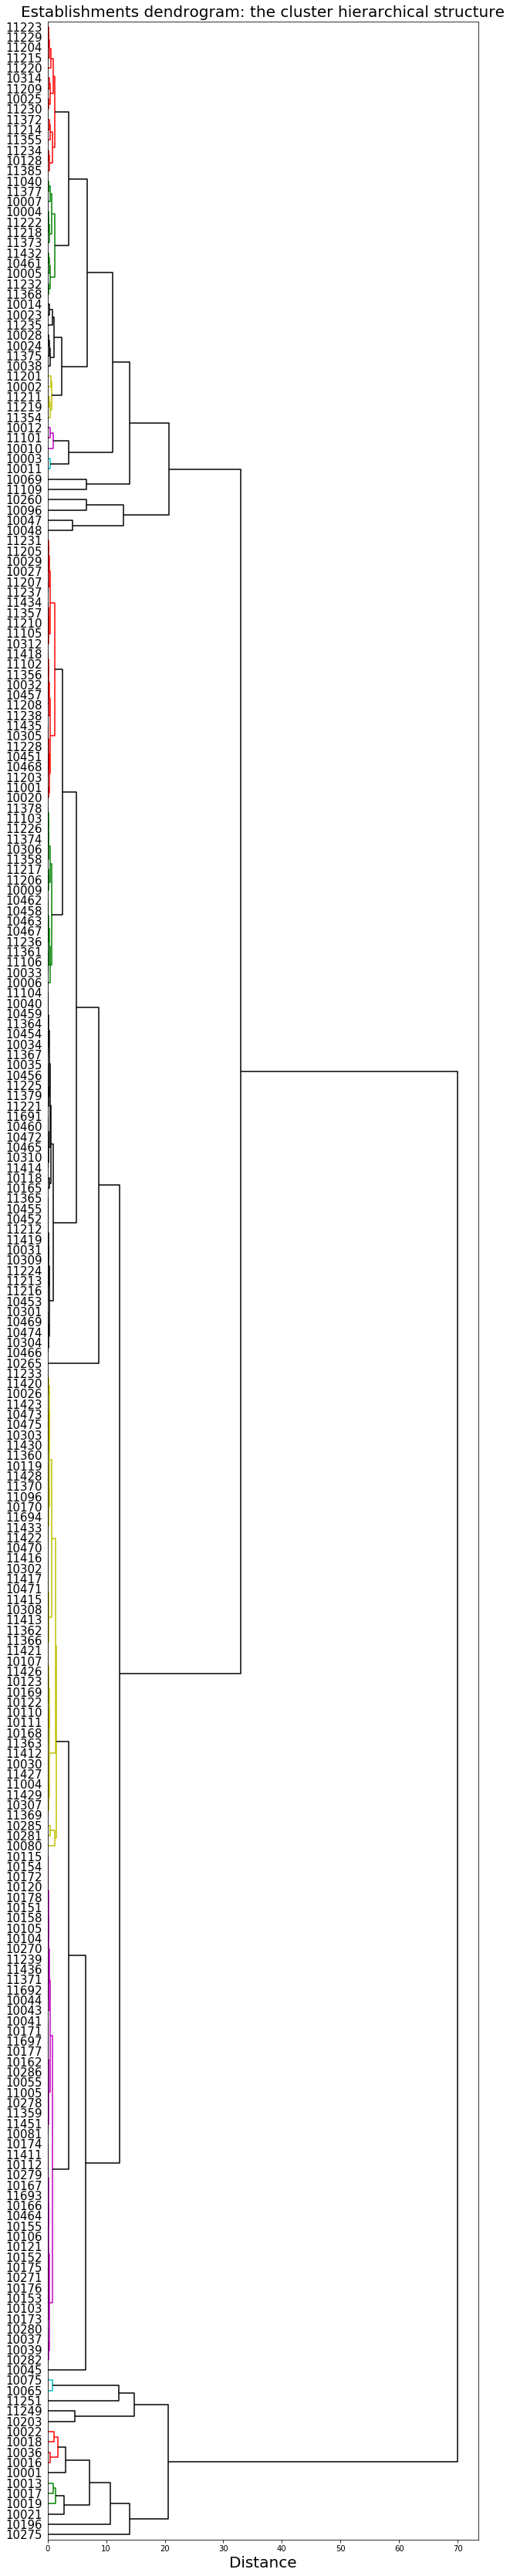

In [124]:
matrixwhite = df2.iloc[:,:21].as_matrix(columns=df2.iloc[:,:21].columns)

fig = pl.figure(figsize=(10,60))

ddg = spc.hierarchy.dendrogram(spc.hierarchy.linkage(matrixwhite, method='ward'),
                               labels=df2.index.values,
                               leaf_rotation=90, leaf_font_size=20, p=12,
                               show_contracted=True, color_threshold=2, 
                               orientation='right', above_threshold_color='k')

pl.xlabel('Distance', fontsize=20)
pl.yticks(rotation=0, fontsize=15)
pl.grid('off')
pl.title('Establishments dendrogram: the cluster hierarchical structure', fontsize=20)

## Figure 5. Establishments dendrogram: the cluster hierarchical structure

## Overlay your data on a NYC map

In [128]:
zipcode['ZIPCODE'] = zipcode['ZIPCODE'].astype(int)
df3 = zipcode.merge(df2[['km5', 'ac']], left_on='ZIPCODE', right_index=True)

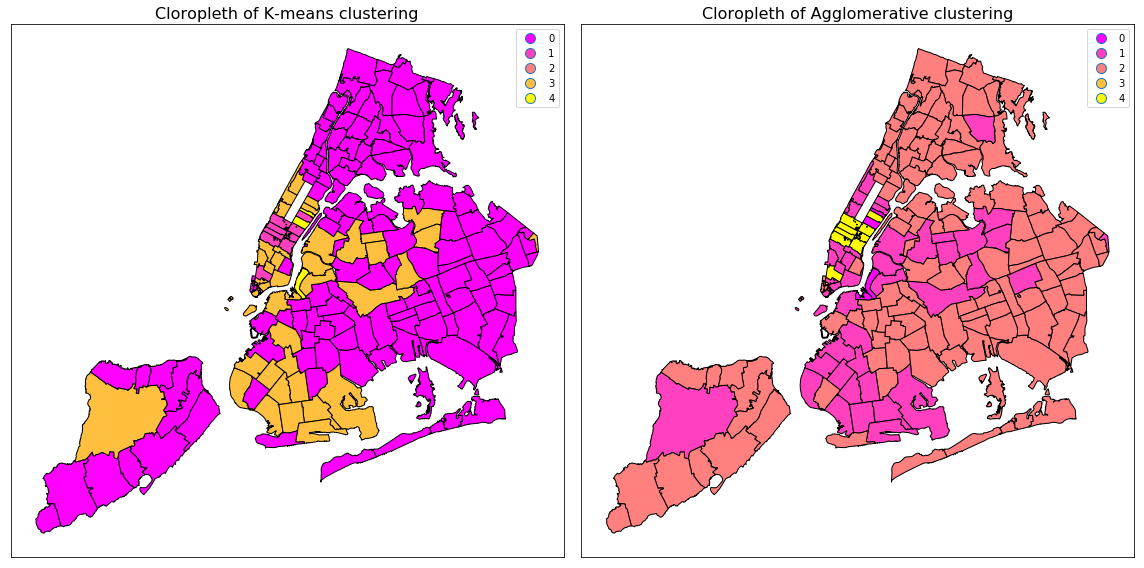

In [131]:
pl.figure(figsize=(16,8))

# plot K-means clustering results
ax1 = pl.subplot(121)
df3.plot(column='km5', cmap='spring', edgecolor='black', categorical=True, legend=True, ax=ax1)

ax1.set_title('Cloropleth of K-means clustering', fontsize=16)
ax1.tick_params(axis='both', left='off', bottom='off')
ax1.set_xticklabels('')
ax1.set_yticklabels('')

# plot agglomerative clustering results
ax2 = pl.subplot(122)
df3.plot(column='ac', cmap='spring', edgecolor='black', categorical=True, legend=True, ax=ax2)

ax2.set_title('Cloropleth of Agglomerative clustering', fontsize=16)
ax2.tick_params(axis='both', left='off', bottom='off')
ax2.set_xticklabels('')
ax2.set_yticklabels('')

pl.tight_layout()

## Compare the results of the 2 algorithms

/Users/zhoubaoling/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


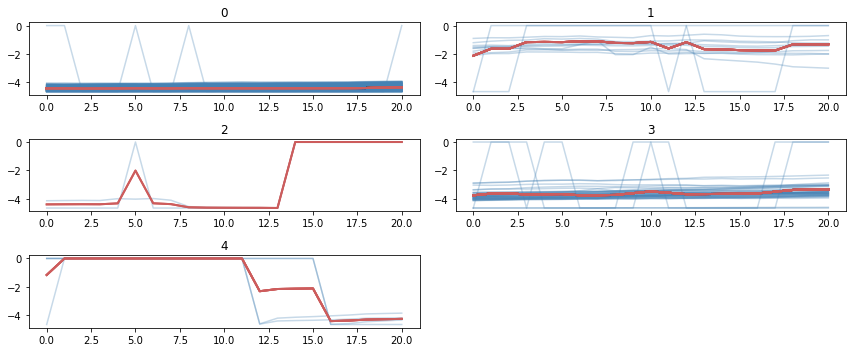

In [132]:
# 5 clusters
plotKM(5, df2)

## Fig 2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means in 5 clusters

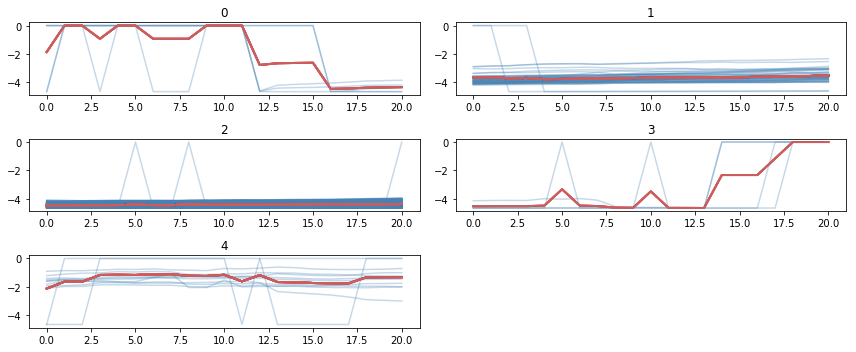

In [133]:
pl.figure(figsize=(12,8))
for l in range(5):
    df_ = df2[df2['ac'] == l]
    means = df_.mean(axis=0)
    pl.subplot(521+l)
    for i in range(len(df_)):
        pl.plot(range(0,21), df_.iloc[i,:21], 'steelblue', alpha=0.3)
        pl.plot(range(0,21), means[0:21], 'indianred', linewidth=2)
    pl.title(l)
pl.tight_layout()


## Figure 4. cluster the NUMBER OF ESTABLISHMENTS time series with Aggolomerative clustering in 5 clusters

The Clustering map of the 2 algorithms are very similar. However, all five groups shows differet growing trends regarding two different algorithms. For example, it shows a steady growing trend in group 3 regarding aggolomerative clustering, but we can only observe a flat line in k-means clustering plotting.

## attempt an interpretation

Based on the K-means Clustering. It shows obvious growing pattern of business establishment in Brooklyn and Queens. On the other hand, there is an dramatic declining in number of business establishment in Mahattan areas. It is can be explained by the saturation of opportunities and spaces of the areas.